In [7]:
import pandas as pd

file_path = 'mobile_sale.csv'
data = pd.read_csv(file_path)

data.head()

,Unnamed: 0,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,0.0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,10,Apple,1196.95,85,28002.80,32.0,Female,Chypre,Online
1,1.0,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,10,Apple,1010.34,64,2378.82,55.0,Female,Andorre,Credit Card
2,2.0,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,7,Nokia,400.8,95,31322.56,57.0,Male,Finlande,Online
3,3.0,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,P30,Huawei,338.6,79,31159.75,46.0,Other,Dominique,Cash
4,4.0,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,Exodus,HTC,839.79,41,11523.36,38.0,Male,Chypre,Online


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1095 non-null   float64
 1   TransactionID   1096 non-null   object 
 2   Date            1096 non-null   object 
 3   MobileModel     1096 non-null   object 
 4   Brand           1095 non-null   object 
 5   Price           1095 non-null   object 
 6   UnitsSold       1095 non-null   object 
 7   TotalRevenue    1094 non-null   float64
 8   CustomerAge     1094 non-null   float64
 9   CustomerGender  1094 non-null   object 
 10  Location        1094 non-null   object 
 11  PaymentMethod   1094 non-null   object 
dtypes: float64(3), object(9)
memory usage: 102.9+ KB
None


In [10]:
data.columns

Index(['Unnamed: 0', 'TransactionID', 'Date', 'MobileModel', 'Brand', 'Price',
       'UnitsSold', 'TotalRevenue', 'CustomerAge', 'CustomerGender',
       'Location', 'PaymentMethod'],
      dtype='object')

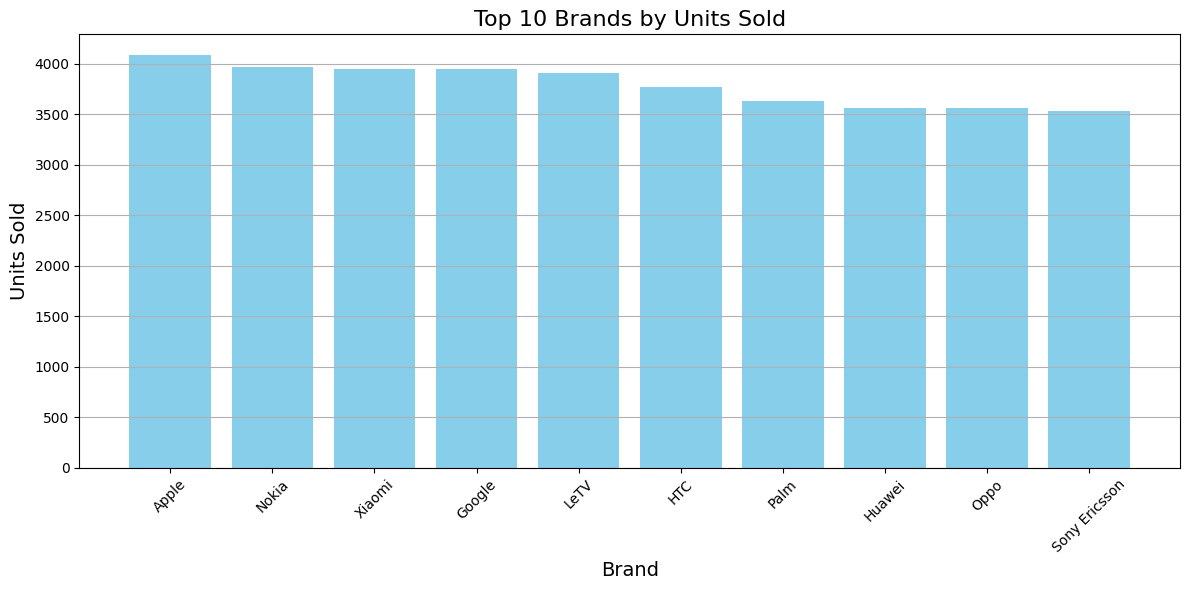

In [66]:
import matplotlib.pyplot as plt

top_10_brands = brand_sales_summary.nlargest(10, 'UnitsSold')

top_10_brands.to_csv('top_10_brands.csv', index=False)

plt.figure(figsize=(12, 6))
plt.bar(top_10_brands['Brand'], top_10_brands['UnitsSold'], color='skyblue')
plt.title('Top 10 Brands by Units Sold', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Units Sold', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [61]:
from tabulate import tabulate

data['UnitsSold'] = pd.to_numeric(data['UnitsSold'], errors='coerce')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

total_units_sold = data['UnitsSold'].sum()

data['TotalRevenue'] = data['UnitsSold'] * data['Price']

brand_sales_summary = data.groupby('Brand').agg({'UnitsSold': 'sum', 'TotalRevenue': 'sum'}).reset_index()

brand_sales_summary['MarketShare (%)'] = (brand_sales_summary['UnitsSold'] / total_units_sold) * 100

market_share_summary = brand_sales_summary[['Brand', 'UnitsSold', 'TotalRevenue', 'MarketShare (%)']]
market_share_summary.sort_values(by='MarketShare (%)', ascending=False, inplace=True)

market_share_summary.to_csv('market_share_summary.csv', index=False)

print(tabulate(market_share_summary, headers='keys', tablefmt='grid', numalign='right', stralign='center'))


+----+---------------------------------+-------------+----------------+-------------------+
|    |              Brand              |   UnitsSold |   TotalRevenue |   MarketShare (%) |
+====+=================================+=============+================+===================+
|  4 |              Apple              |        4087 |    3.54597e+06 |            7.4896 |
+----+---------------------------------+-------------+----------------+-------------------+
| 60 |              Nokia              |        3968 |    3.15957e+06 |           7.27153 |
+----+---------------------------------+-------------+----------------+-------------------+
| 83 |             Xiaomi              |        3953 |    3.07374e+06 |           7.24404 |
+----+---------------------------------+-------------+----------------+-------------------+
| 28 |             Google              |        3952 |    3.49827e+06 |           7.24221 |
+----+---------------------------------+-------------+----------------+---------

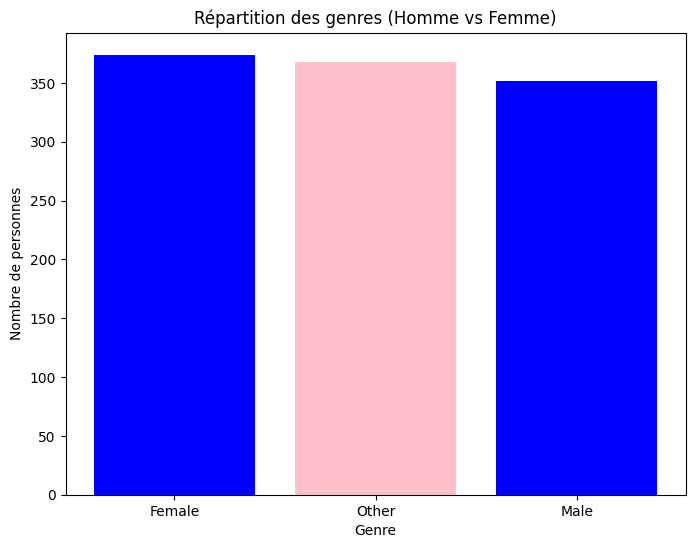

In [67]:
gender_counts = data['CustomerGender'].value_counts()

gender_counts.to_csv('gender_distribution.csv', index=True, header=['Count'])

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel('Genre')
plt.ylabel('Nombre de personnes')
plt.title('Répartition des genres (Homme vs Femme)')
plt.show()

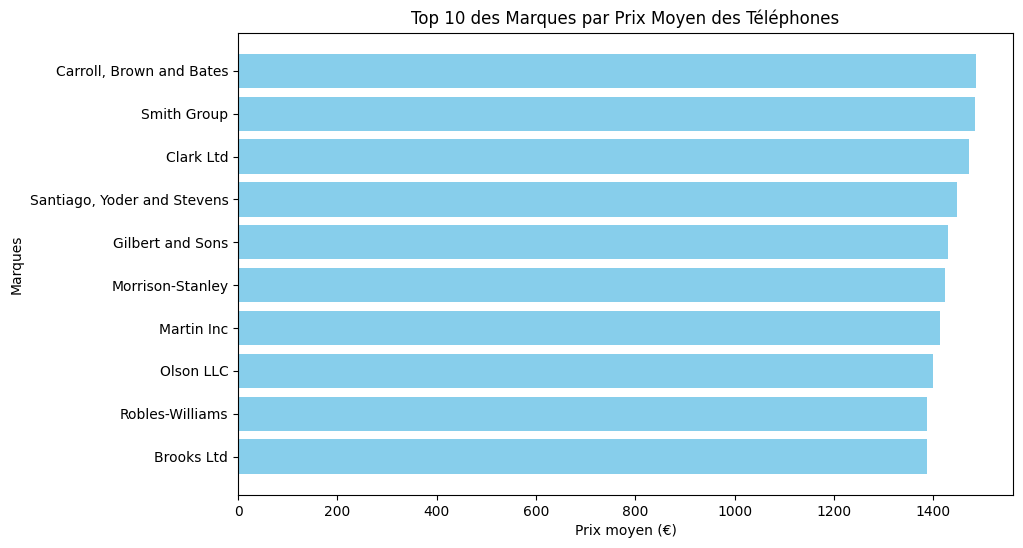

In [57]:
data['UnitsSold'] = pd.to_numeric(data['UnitsSold'], errors='coerce')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

brand_price_summary = data.groupby('Brand').agg({'Price': 'mean'}).reset_index()

top_10_brands = brand_price_summary.sort_values(by='Price', ascending=False).head(10)

top_10_brands.to_csv('top_10_brands.csv', index=False)

plt.figure(figsize=(10, 6))
plt.barh(top_10_brands['Brand'], top_10_brands['Price'], color='skyblue')
plt.xlabel('Prix moyen (€)')
plt.ylabel('Marques')
plt.title('Top 10 des Marques par Prix Moyen des Téléphones')
plt.gca().invert_yaxis() 
plt.show()

/var/folders/cx/dkn2n75x27l_p234vf3pnc7m0000gn/T/ipykernel_93096/3893630495.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='UnitsSold', y='Location', data=top_20_countries_units, palette='viridis')


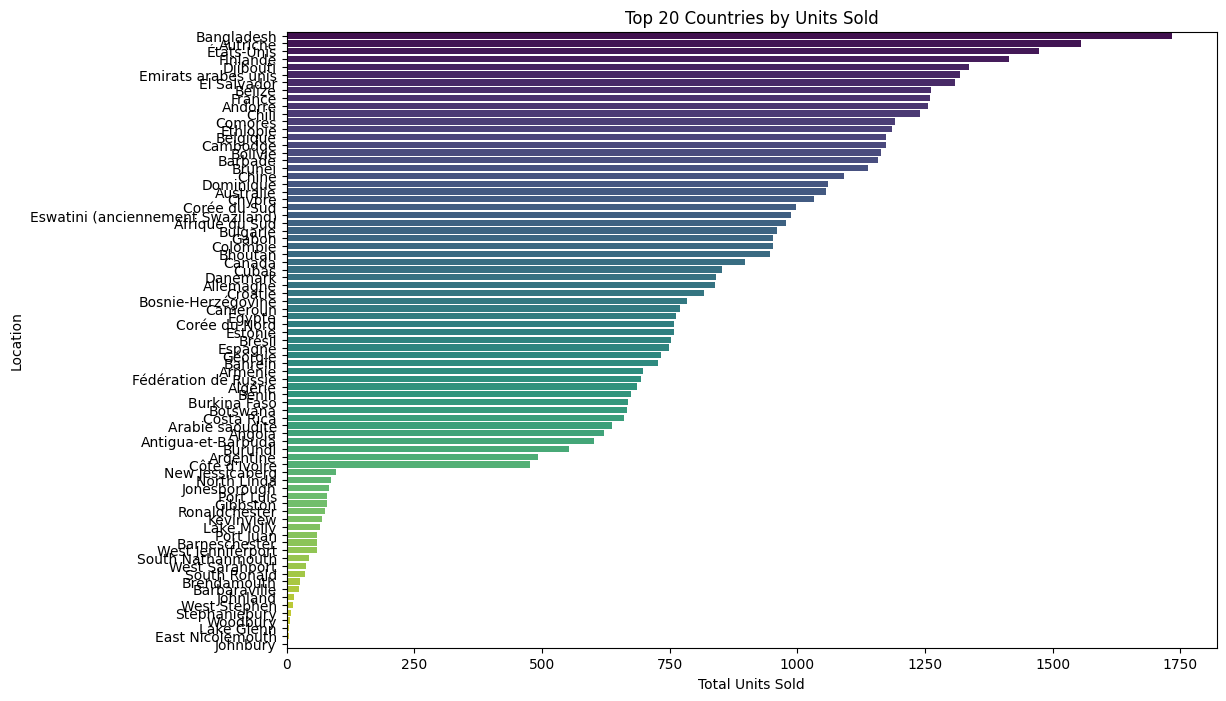

In [56]:
import seaborn as sns

data['UnitsSold'] = pd.to_numeric(data['UnitsSold'], errors='coerce')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

country_sales_summary = data.groupby('Location').agg({'UnitsSold': 'sum'}).reset_index()

top_20_countries_units = country_sales_summary.sort_values(by='UnitsSold', ascending=False)

top_20_countries_units.to_csv('top_20_countries_units.csv', index=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='UnitsSold', y='Location', data=top_20_countries_units, palette='viridis')
plt.xlabel('Total Units Sold')
plt.title('Top 20 Countries by Units Sold')
plt.show()


/var/folders/cx/dkn2n75x27l_p234vf3pnc7m0000gn/T/ipykernel_93096/2742418325.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Location', data=top_20_countries_price, palette='magma')


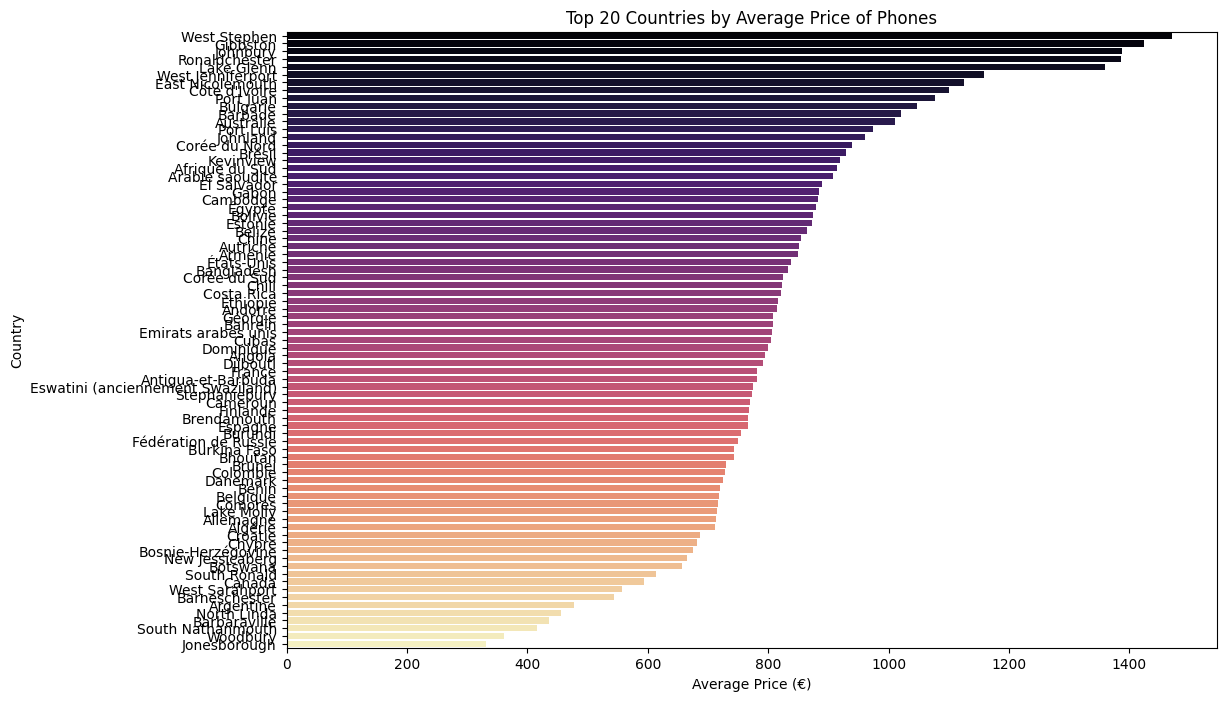

In [55]:
country_price_summary = data.groupby('Location').agg({'Price': 'mean'}).reset_index()

top_20_countries_price = country_price_summary.sort_values(by='Price', ascending=False)

top_20_countries_price.to_csv('top_20_countries_price.csv', index=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='Location', data=top_20_countries_price, palette='magma')
plt.xlabel('Average Price (€)')
plt.ylabel('Country')
plt.title('Top 20 Countries by Average Price of Phones')
plt.show()

ValueError: 'magma' is not a valid color value.

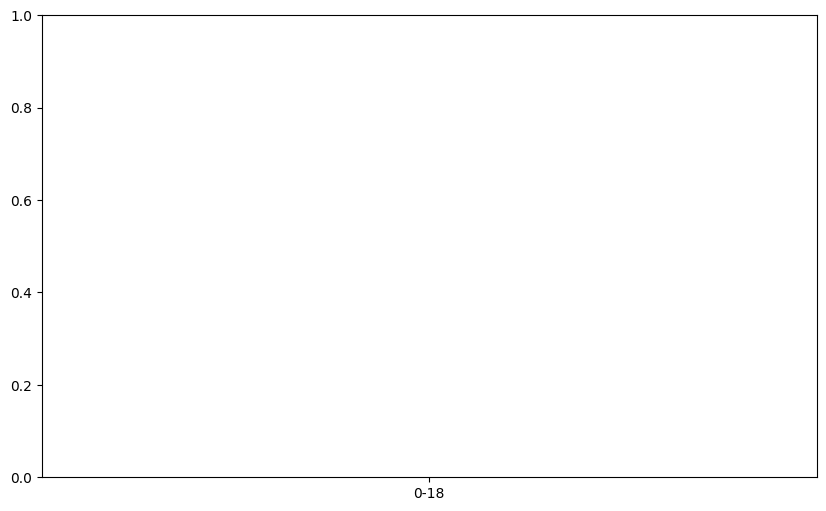

In [69]:
data['CustomerAge'] = pd.to_numeric(data['CustomerAge'], errors='coerce')

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
data['AgeGroup'] = pd.cut(data['CustomerAge'], bins=bins, labels=labels)

age_group_counts = data['AgeGroup'].value_counts().sort_index()

age_group_counts.to_csv('age_group_distribution.csv', index=True, header=['Count'])

plt.figure(figsize=(10, 6))
plt.bar(age_group_counts.index, age_group_counts.values, palette='magma')
plt.xlabel('Groupes d\'âge')
plt.ylabel('Nombre de ventes')
plt.title('Distribution des achats par groupe d\'âge')
plt.show()